In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist 

In [8]:
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N) # class 1
X1 = np.random.multivariate_normal(means[1], cov, N) # class -1 
X = np.concatenate((X0.T, X1.T), axis = 1) # all data 
y = np.concatenate((np.ones((1, N)), -1*np.ones((1, N))), axis = 1) # labels 

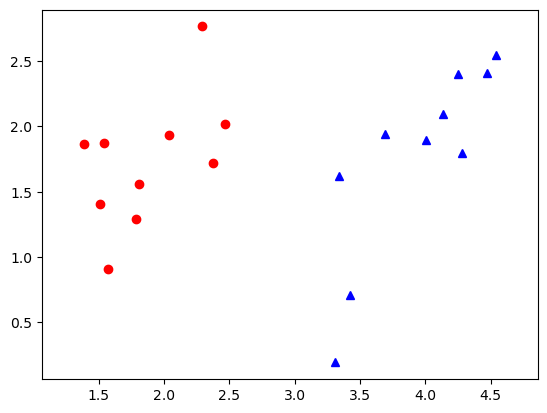

In [12]:
X0 = X[:, y[0]==-1]
X1 = X[:, y[0]==1]
plt.plot(X0[0,:], X0[1,:], 'b^')
plt.plot(X1[0,:], X1[1,:], 'ro')
plt.axis('equal')
plt.show()

In [18]:
from sklearn.svm import SVC
y_1 = y.reshape((2*N,))
x_1 = X.T
clf = SVC(kernel='linear', C=1e5)
clf.fit(x_1, y_1)
w = clf.coef_
b = clf.intercept_
print(w)
print(b)

[[-2.00971102  0.64194082]]
[4.66595309]


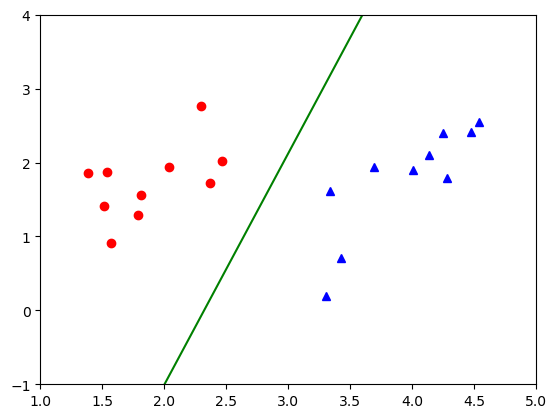

In [29]:
X0 = X[:, y[0]==-1]
X1 = X[:, y[0]==1]
plt.plot(X0[0,:], X0[1,:], 'b^')
plt.plot(X1[0,:], X1[1,:], 'ro')
# w0x + w1y + b = 0
xx = np.linspace(0, 5, 2)
yy = (-b-w[0][0]*xx)/w[0][1]
plt.plot(xx, yy, 'g')
#plt.axis('equal')
plt.ylim(-1,4)
plt.xlim(1,5)
plt.show()

In [13]:
from cvxopt import matrix, solvers